# Принятие решений в бизнесе на основе данных

**Контекст проекта:** 
Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки.

**Задача:** Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Описание данных

**Файл /datasets/hypothesis.csv**. 
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 
Чем больше значение Efforts, тем дороже проверка гипотезы.

**Файл /datasets/orders.csv**. 
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv.** 
- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

# Описание проекта

# Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

# Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализируйте A/B-тест:

- 1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- 2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- 3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- 4) Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- 5) Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- 6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- 7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- 8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- 9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- 10) Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- 11) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- 12) Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- 13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- 14) Примите решение по результатам теста и объясните его. 

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

# Оглавление

* [Часть 1. Приоритизация гипотез](#section1)
* [Часть 2. Анализ A/B-теста](#section2)
* [Часть 2. Анализ A/B-теста: расчёт коммулятивных данных](#section3)
* [Часть 2. Анализ A/B-теста: построение графиков по коммулятивным данным](#section4)
* [Часть 2. Анализ A/B-теста: проверка гипотез](#section5)
* [Вывод по A/B-тесту](#section6)
* [Общий вывод по проекту](#section7)

<a id='#section1'></a>

## Приоритизация гипотез

In [1]:
#импортирую панд и другие библиотеки
import pandas as pd 
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
hp = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hp['ICE'] = (hp['Impact'] * hp['Confidence']) / hp['Efforts']
hp['ICE'] = hp['ICE'].astype('int')

In [5]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

In [6]:
hp.sort_values(['ICE'],ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1


In [7]:
hp['RICE'] = (hp['Reach'] * hp['Impact'] * hp['Confidence']) / hp['Efforts']
hp['RICE'] = hp['RICE'].astype('int')

In [8]:
hp.sort_values(['RICE'],ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,3


По результату оценки гипотиз фреймворком ICE, наиболее приоритетными являются гипотезы:

- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

При оценце фреймворком RICE приоритеты немного изменяются. Так, из тройки лидеров пропадает гипотеза о скудке в день рождения, а вместе неё в тройку лидеров попадает "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".	

При сравнении двух подходов можно сделать вывод, что наиболее приоритетными являются: 

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	

, так как они сохранили лидерские позиции вне зависимости от применяемого фреймоврка. Аналогично наименее приоритетными являются гипотезы: 

- Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей	
- Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
- Запустить собственную службу доставки, что сократит срок доставки заказов	
- Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар

Различия в результатах применения фреймворков ICE и RICE обусловлены учитыванием во втором случае числа пользователей, которых затронет применение гипотезы.

<a id='#section2'></a>

## Анализ A/B-теста

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет

In [12]:
#меняю типы данных
orders['date'] = pd.to_datetime(orders['date'])
visitors['date']  = pd.to_datetime(visitors['date'])

In [13]:
orders['date'].min(), orders['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

In [14]:
visitors['date'].min(), visitors['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

Имеем данные за август 2019 года

In [15]:
orders.duplicated().sum(), visitors.duplicated().sum()

(0, 0)

Дублей нет

Считаю комулятивные данные:

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()

In [17]:
#по дням о заказах:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
#о посетителях:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
#собираю всё в одну таблицу:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [20]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<a id='#section4'></a>

**1) Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


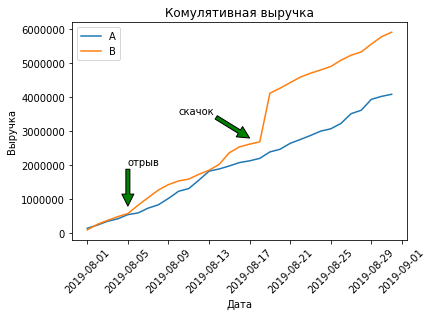

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строю график выручки А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строю график выручки B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation= 45)
plt.title('Комулятивная выручка')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend() 
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.show()

График группы А растёт равномерно, в то время как группа В имеет скачок в районе 17 августа. Похоже, что в этот день был выброс в виде очень большой покупки.

Если не учитывать этот выброс, графика стабилизируются после 18 августа и идут равномерно. 

**2) Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

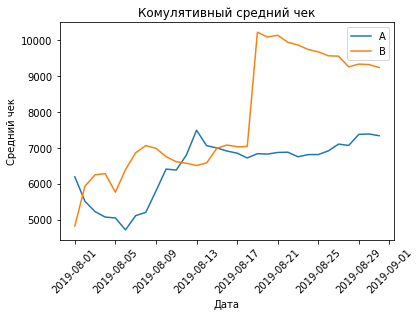

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation= 45)
plt.title('Комулятивный средний чек')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend() 

plt.show()

Предположение по графику комулятивной выручки подтверждается, 17 августа средний чек по группе В резко растёт. 
Это влияет и на дальнейшее поведение графика для группы В. 

**3) Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

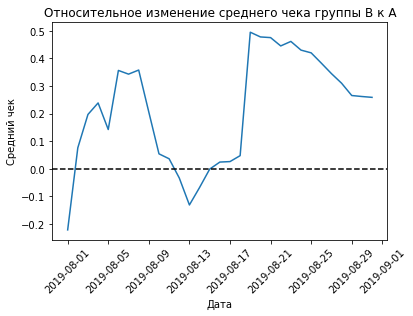

In [24]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation= 45)
plt.title('Относительное изменение среднего чека группы В к А')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График "скачет". Явно в данных прячутся выбросы

**4) Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.**

In [25]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

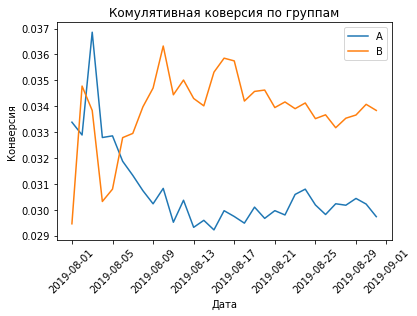

In [26]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation= 45)
plt.title('Комулятивная коверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

Графиик почти симметричный. Одинаковый всплеск в начале и дальнейшее расхождение. Нельзя сказать, что график стабилизировался к концу. 

**5) Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.**

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

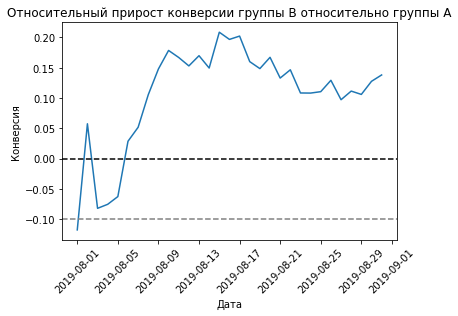

In [28]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation= 45)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

В начале конверсия группы В была сильно ниже конверсии группы А. Затем видим небольшой скачок и падение. 4 августа произошёл скачок, после которого группа В уверенно лидирует в конверсии перед группой А. 

**6) Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

In [29]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

In [30]:
print(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть аж два чемпиона-посетителя,которые сделали 11 заказов. По первым 10 значениям видно, что это нехарактерное для всей выборки значение. 

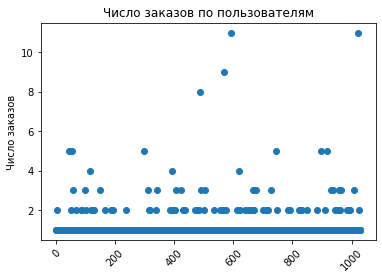

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.xticks(rotation= 45)
plt.title('Число заказов по пользователям')
plt.ylabel('Число заказов')
plt.show()

In [32]:
ordersByUsers['orders'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
9       1
8       1
Name: orders, dtype: int64

На графике видим, что значения выше 8 - явные выбросы. Чаще всего пользователи делают только 1 заказ. 

**7) Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [33]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Лишь 5% посетителей заказывали 2 и более раз, и только 1% сделал больше 4 заказов. Нижней границей определения аномального числа заказов определим **4 и более заказов**

**8) Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

In [34]:
costByOrders = orders.drop(['group', 'visitorId', 'date'], axis=1)

In [35]:
values = pd.Series(range(0,len(costByOrders)))

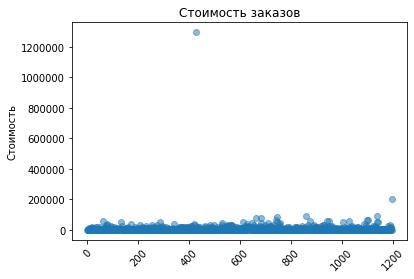

In [36]:
plt.scatter(values, costByOrders['revenue'], alpha ='0.5') 
plt.xticks(rotation= 45)
plt.title('Стоимость заказов')
plt.ylabel('Стоимость')
plt.show()

Видим наличие выброса: один заказ превысил 1,2 млн. рублей. Также есть один выбивающийся заказ, превышающий 200 тысяч рублей

**9) Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [37]:
print(np.percentile(costByOrders['revenue'], [95, 99])) 

[28000.  58233.2]


Получается, что только 5% посетителей сделали заказ на 28 тысяч рублей и более. Лишь 1% совершили покупку более чем на 58 тысяч. Нижней границей определения аномальной стоимости заказа определим **28 тысяч рублей**

**10) Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.**

In [38]:
#Подготавливаю данные:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [39]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [40]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [41]:
#Собираю подготовленные данные в общую таблицу:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [42]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [43]:
#Готовлю данные к проверке критерием Манна-Уитни
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(
        data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(
        data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Гипотеза H₀: Между группами нет статистически значимых различий конверсий

Альтернативная гипотеза: Статистически значимые различия конверсий между группами есть

In [44]:
#считаю конверсии и их прирост:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(
        data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(
        data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.008
0.138


Полученное значение p-value меньше 0,05, следовательно, отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. 

Относительный выигрыш группы В равен 13,8%. 

**11) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

Гипотеза H₀: Между группами нет статистически значимых различий среднего чека

Альтернативная гипотеза: Статистически значимые различия среднего чека между группами есть

In [45]:
print("{0:.3f}".format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print("{0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


Получаем p-value сильно больше 0,05. Не отвергаем нулевую гипотезу о том, что в среднем чеке по группам есть различия.

При этом средний чек группы В больше среднего чека группы А на 25,9%. 

**12) Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.**

Гипотеза H₀: Между группами нет статистически значимых различий конверсий

Альтернативная гипотеза: Статистически значимые различия конверсий между группами есть

In [46]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], 
     ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitorId, dtype: int64
(59,)


Получается, 59 пользователей, показавших аномальные значения стоимости заказа или их числа. 

In [47]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [48]:
#Для проверки воздействия выбросов применяю критерий Манна-Уитни:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.009
0.145


Значение p-value почти не изменилось. Выигрыш группы В вырос на 1%

**13) Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

Гипотеза H₀: Между группами нет статистически значимых различий среднего чека

Альтернативная гипотеза: Статистически значимые различия среднего чека между группами есть

In [49]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(
        orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.481
-0.014


P-value вырос, но выигрыш группы В на 25,9% сменился отставанием на 1,7%.

<a id='#section6'></a>

## Решение по результатам теста

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и по очищенным от аномалий. 
- Что по очищенным, что по сырым данным статистических различий в среднем чеке заказа между группами нет.
- При этом средний чек группы В по сырым данным больше среднего чаго группы А почти на 26%, а при очистке данных этот показатель сменяется на - 1,7%. 


- График различия конверсии между группами показывает, что показатели группы В лучше, чем у группы А. Большую часть теста линия группы В на графике стабильно находится в положительной зоне, показывая тенденцию к росту. 
- График среднего чека коллеблется из-за выюросов, однако к концу наблюдений стабилизировался выше показателей группы А. 

### Решение: Остановить тест. Признаём его успешность и переходим к проверке следующей гипотезы.

## Вывод по проекту

На входе имел два датафрейма. Импортировал нужные библиотеки, оценил таблицы, изменил формат дат, проверил на дубликаты и пропуски. 

В первой части провёл приоретизацию гипотез фреймворками ICE и RICE. По результату оценки наиболее приоритетными стали гипотезы: 

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Далее перешёл к A/B тесту. 

- Построил график кумулятивной выручки по группам. По нему сделал вывод о наличии выбросов в виде очень крупных покупок в одной из групп. 
- Построил график кумулятивного среднего чека по группам. Он также подтвердил наличие выброса.
- Построение и анализ графика относительного изменения кумулятивного среднего чека группы B к группе A подтвердил предыдущие выводы. 
- График относительного изменения кумулятивной конверсии группы B к группе A показал, что группа В уверенно лидирует в конверсии перед группой А.
- Точечный график количества заказов по пользователям и среднего чека, а так посчет 95 и 99 перцентилей помогли определить границу выбросов: **4 заказа на пользователя и 28000 рублей на чек.**

Дальнейшая проверка гипотез показала: 
- Не отвергаем нулевую гипотезу о том, что в среднем чеке по группам по "сырым" данным есть различия.
- Отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии по "сырым" данным между группами нет.

При очистке данных от выбросов выводы по проверке гипотез не изменились.

По результату A/B-теста заключил: **Остановить тест. Признаём его успешность и переходим к проверке следующей гипотезы**